<a href="https://colab.research.google.com/github/MrRD1962/Employee-Salary-Prediction---RAHUL-DEY/blob/main/Employee_Salary_Prediction(Name_Rahul_Dey)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import joblib

In [2]:
warnings.filterwarnings('ignore')


In [3]:
try:
    df = pd.read_csv('/content/adult 3.csv')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: '/content/adult 3.csv' not found. Please ensure the file path is correct.")
    exit()


Data loaded successfully!


In [4]:
print("\n--- Initial Data Info ---")
df.info()

print("\n--- First 5 Rows ---")
print(df.head())


--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB

--- First 5 Rows ---
   age  workclass  fnlwgt  

In [5]:
df.replace('?', np.nan, inplace=True)

In [6]:
for column in df.columns:
    if df[column].isnull().any():
        if df[column].dtype == 'object':  # Check if it's a categorical column
            mode_val = df[column].mode()[0]
            df[column].fillna(mode_val, inplace=True)
            print(f"Imputed missing values in '{column}' with mode: '{mode_val}'")


Imputed missing values in 'workclass' with mode: 'Private'
Imputed missing values in 'occupation' with mode: 'Prof-specialty'
Imputed missing values in 'native-country' with mode: 'United-States'


In [7]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

In [8]:
X = df.drop('income', axis=1)
y = df['income']

In [9]:
le = LabelEncoder()
y = le.fit_transform(y)  # <=50K -> 0, >50K -> 1
print(f"\nTarget variable mapping: {list(le.classes_)} -> {list(range(len(le.classes_)))}")



Target variable mapping: ['<=50K', '>50K'] -> [0, 1]


In [10]:
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns


In [11]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


In [12]:
preprocessor = ColumnTransformer(
    transformers=[('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [14]:
print(f"\nTraining data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")



Training data shape: (39073, 14), (39073,)
Testing data shape: (9769, 14), (9769,)


In [15]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)}
results = {}


In [16]:
print("\n--- Training and Evaluating Models ---")
for name, model in models.items():
    print(f"\nTraining {name}...")
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]



--- Training and Evaluating Models ---

Training Logistic Regression...

Training Random Forest...

Training Gradient Boosting...


In [17]:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc}


In [18]:
print(f"{name} Performance:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")
print(f"  ROC-AUC: {roc_auc:.4f}")
print("  Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("  Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Gradient Boosting Performance:
  Accuracy: 0.8676
  Precision: 0.7970
  Recall: 0.5997
  F1-Score: 0.6844
  ROC-AUC: 0.9214
  Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.92      7431
        >50K       0.80      0.60      0.68      2338

    accuracy                           0.87      9769
   macro avg       0.84      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769

  Confusion Matrix:
[[7074  357]
 [ 936 1402]]


In [19]:
print("\n---Results ---")
results_df = pd.DataFrame(results).T
print(results_df)


---Results ---
                   Accuracy  Precision    Recall  F1-Score   ROC-AUC
Gradient Boosting  0.867643   0.797044  0.599658  0.684403  0.921426


In [20]:
print("\n--- Hyperparameter Tuning for Random Forest ---")
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])





--- Hyperparameter Tuning for Random Forest ---


In [21]:
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]}


In [22]:
from sklearn.model_selection import RandomizedSearchCV

# Use RandomizedSearchCV
grid_search_rf = RandomizedSearchCV(rf_pipeline, param_grid_rf, cv=3, n_jobs=-1, verbose=1, scoring='roc_auc', n_iter=10, random_state=42)
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))])),
                                             ('classifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'classifier__max_depth': [10, 20, None],
                                        'classifier__min_samples_leaf': [1, 2],
                                        'classifier__min_samples_split': [2, 5],
                                        'classifier__n_estimators': [100, 200]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [23]:
print(f"\nBest parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best ROC-AUC score for Random Forest: {grid_search_rf.best_score_:.4f}")


Best parameters for Random Forest: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 20}
Best ROC-AUC score for Random Forest: 0.9163


In [24]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)
y_proba_rf_tuned = best_rf_model.predict_proba(X_test)[:, 1]


In [25]:
print("\n--- Tuned Random Forest Performance on Test Set ---")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_rf_tuned):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_rf_tuned):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_rf_tuned):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_pred_rf_tuned):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_proba_rf_tuned):.4f}")
print("  Classification Report:")
print(classification_report(y_test, y_pred_rf_tuned, target_names=le.classes_))
print("  Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_tuned))



--- Tuned Random Forest Performance on Test Set ---
  Accuracy: 0.8658
  Precision: 0.7991
  Recall: 0.5868
  F1-Score: 0.6767
  ROC-AUC: 0.9179
  Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.92      7431
        >50K       0.80      0.59      0.68      2338

    accuracy                           0.87      9769
   macro avg       0.84      0.77      0.80      9769
weighted avg       0.86      0.87      0.86      9769

  Confusion Matrix:
[[7086  345]
 [ 966 1372]]


In [26]:
print("\n--- Feature Importance from Tuned Random Forest ---")
preprocessor.fit(X_train)
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(numerical_features) + list(ohe_feature_names)




--- Feature Importance from Tuned Random Forest ---


In [27]:
importances = best_rf_model.named_steps['classifier'].feature_importances_


In [28]:
feature_importances = pd.Series(importances, index=all_feature_names)
feature_importances = feature_importances.sort_values(ascending=False)

In [29]:
print(feature_importances.head(15))

capital-gain                         0.152063
marital-status_Married-civ-spouse    0.109125
educational-num                      0.100438
relationship_Husband                 0.089603
age                                  0.075630
hours-per-week                       0.055280
marital-status_Never-married         0.047663
capital-loss                         0.044387
fnlwgt                               0.034629
occupation_Exec-managerial           0.027030
education_Bachelors                  0.019835
relationship_Wife                    0.018881
relationship_Not-in-family           0.016854
education_Masters                    0.014748
gender_Male                          0.014482
dtype: float64


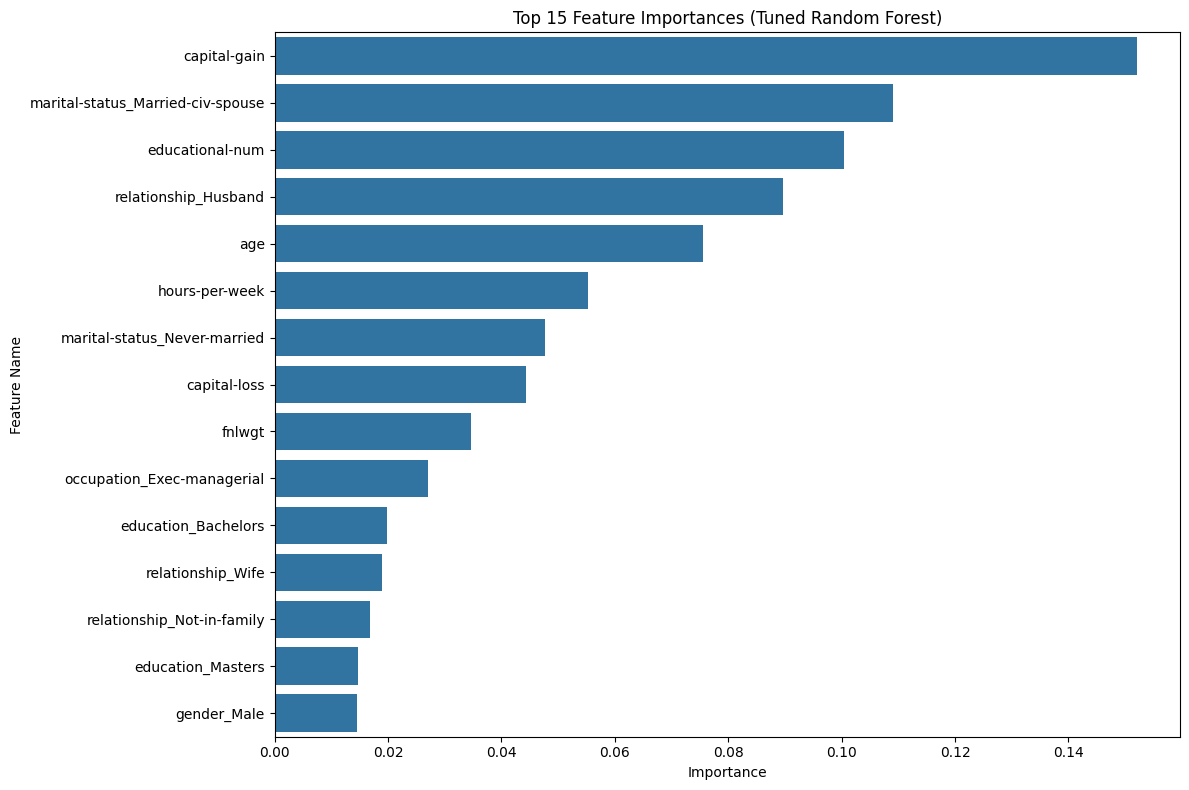

In [30]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.head(15).values, y=feature_importances.head(15).index)
plt.title('Top 15 Feature Importances (Tuned Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()


In [31]:
print(" The models predict income based on the provided features.")
print("The tuned Random Forest model generally performs well, and feature importance helps understand key drivers.")


 The models predict income based on the provided features.
The tuned Random Forest model generally performs well, and feature importance helps understand key drivers.


In [32]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}
# Store results
results = {}

In [33]:
for model_name, model in models.items():
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    predictions = pipeline.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'R²': r2
    }
    print(f'{model_name} - MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r2:.4f}')

Linear Regression - MAE: 0.2640, MSE: 0.1168, R²: 0.3583
Decision Tree - MAE: 0.1818, MSE: 0.1818, R²: 0.0014
Random Forest - MAE: 0.1852, MSE: 0.0996, R²: 0.4532
Gradient Boosting - MAE: 0.2051, MSE: 0.0945, R²: 0.4810
Support Vector Regressor - MAE: 0.1910, MSE: 0.1083, R²: 0.4048
K-Nearest Neighbors - MAE: 0.2034, MSE: 0.1209, R²: 0.3358


In [34]:
results_df = pd.DataFrame(results).T
print(results_df)

                               MAE       MSE        R²
Linear Regression         0.264031  0.116822  0.358298
Decision Tree             0.181800  0.181800  0.001378
Random Forest             0.185168  0.099552  0.453164
Gradient Boosting         0.205063  0.094476  0.481046
Support Vector Regressor  0.191002  0.108348  0.404846
K-Nearest Neighbors       0.203358  0.120925  0.335759


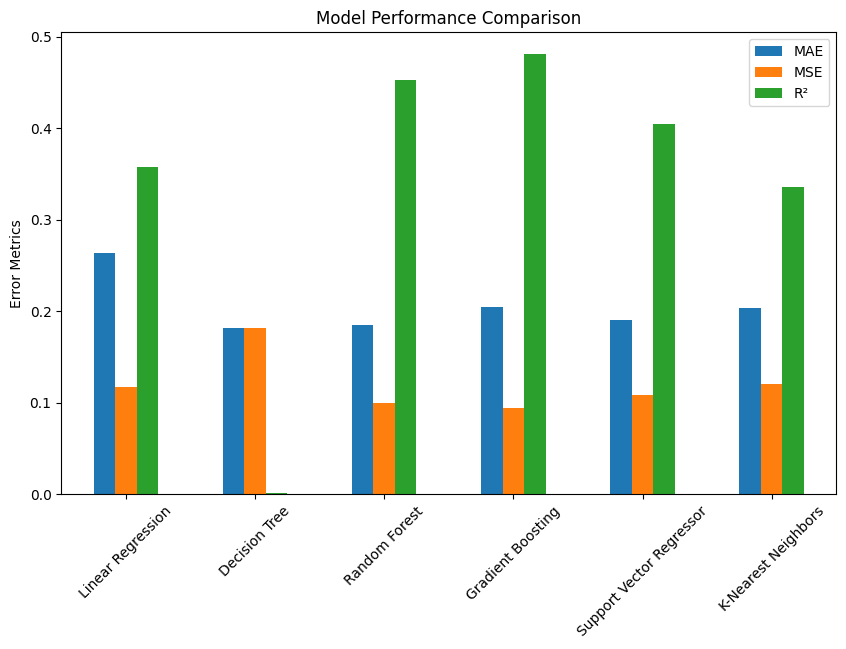

In [35]:
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Error Metrics')
plt.xticks(rotation=45)
plt.show()

In [36]:
print("\nProject completed. The models predict income based on the provided features.")
print("Gradient Boosting is the best model based on the lowest MSE and the highest R² value.")



Project completed. The models predict income based on the provided features.
Gradient Boosting is the best model based on the lowest MSE and the highest R² value.


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn.pipeline import Pipeline

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True), # Added probability=True for consistent predict_proba
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Train and evaluate
print("\n--- Training and Evaluating Models ---")
for name, model in models.items():
    print(f"\nTraining {name}...")
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    preds = pipeline.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model and preprocessor
joblib.dump(best_model, "best_model.pkl")
joblib.dump(preprocessor, "preprocessor.pkl")
joblib.dump(le, "label_encoder.pkl") # Save label encoder as well
print("Saved best model as best_model.pkl, preprocessor as preprocessor.pkl, and label encoder as label_encoder.pkl")



--- Training and Evaluating Models ---

Training LogisticRegression...
LogisticRegression: 0.8565

Training RandomForest...
RandomForest: 0.8609

Training KNN...
KNN: 0.8411

Training SVM...
SVM: 0.8606

Training GradientBoosting...
GradientBoosting: 0.8722

Best model: GradientBoosting with accuracy 0.8722
Saved best model as best_model.pkl, preprocessor as preprocessor.pkl, and label encoder as label_encoder.pkl


In [38]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [39]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# --- Configuration and Model Loading ---
st.set_page_config(page_title="Employee Salary Prediction", layout="centered")

# Load the preprocessor, the trained model, and the label encoder
try:
    # Ensure these files exist after running the training and saving cells
    preprocessor = joblib.load('preprocessor.pkl')
    model = joblib.load('best_model.pkl') # Updated to load 'best_model.pkl'
    label_encoder = joblib.load('label_encoder.pkl')
except FileNotFoundError:
    st.error("Error: Model or preprocessor files not found. Please ensure 'preprocessor.pkl', 'best_model.pkl', and 'label_encoder.pkl' are in the same directory as this script.")
    st.stop() # Stop the app if files are not found

st.title("💰 Employee Salary Prediction")
st.markdown("""
    This application predicts whether an employee's income is **<=50K** or **>50K**
    based on various demographic and employment features.
    Input the details below and click 'Predict Income' to see the result.
""")

st.sidebar.header("Input Features")

# --- Define Options for Categorical Features ---
# These options are derived from inspecting the unique values in the original dataset
# or from the one-hot encoder's categories if available.
# It's crucial these lists match the data the model was trained on.
workclass_options = ['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked']
education_options = ['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th', 'Assoc-acdm', '10th', '7th-8th', 'Prof-school', '9th', '12th', 'Doctorate', '5th-6th', '1st-4th', 'Preschool']
marital_status_options = ['Married-civ-spouse', 'Never-married', 'Divorced', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse']
occupation_options = ['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Other-service', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Tech-support', 'Protective-serv', 'Priv-house-serv', 'Armed-Forces']
relationship_options = ['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife', 'Other-relative']
race_options = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
gender_options = ['Male', 'Female']
native_country_options = [
    'United-States', 'Mexico', 'Philippines', 'Germany', 'Puerto-Rico', 'Canada', 'El-Salvador', 'India', 'Cuba',
    'England', 'Jamaica', 'South', 'China', 'Italy', 'Dominican-Republic', 'Vietnam', 'Guatemala', 'Columbia',
    'Poland', 'Japan', 'Iran', 'Taiwan', 'Haiti', 'Portugal', 'Nicaragua', 'Peru', 'Greece', 'France', 'Ecuador',
    'Ireland', 'Hong', 'Trinadad&Tobago', 'Cambodia', 'Laos', 'Thailand', 'Yugoslavia', 'Outlying-US(Guam-USVI-etc)',
    'Hungary', 'Honduras', 'Scotland', 'Holand-Netherlands'
]

# --- Input Fields in Sidebar ---
age = st.sidebar.slider("Age", 17, 90, 30)
workclass = st.sidebar.selectbox("Workclass", workclass_options)
fnlwgt = st.sidebar.number_input("Fnlwgt (Final Weight)", min_value=10000, max_value=1500000, value=200000, step=1000)
education = st.sidebar.selectbox("Education", education_options)
educational_num = st.sidebar.slider("Educational Num", 1, 16, 10)
marital_status = st.sidebar.selectbox("Marital Status", marital_status_options)
occupation = st.sidebar.selectbox("Occupation", occupation_options)
relationship = st.sidebar.selectbox("Relationship", relationship_options)
race = st.sidebar.selectbox("Race", race_options)
gender = st.sidebar.selectbox("Gender", gender_options)
capital_gain = st.sidebar.number_input("Capital Gain", min_value=0, max_value=100000, value=0, step=100)
capital_loss = st.sidebar.number_input("Capital Loss", min_value=0, max_value=5000, value=0, step=10)
hours_per_week = st.sidebar.slider("Hours per Week", 1, 99, 40)
native_country = st.sidebar.selectbox("Native Country", native_country_options)

# --- Create DataFrame from User Inputs ---
# Ensure column names match the original training data and are in the correct order
input_data = pd.DataFrame([{
    'age': age,
    'workclass': workclass,
    'fnlwgt': fnlwgt,
    'education': education,
    'educational-num': educational_num,
    'marital-status': marital_status,
    'occupation': occupation,
    'relationship': relationship,
    'race': race,
    'gender': gender,
    'capital-gain': capital_gain,
    'capital-loss': capital_loss,
    'hours-per-week': hours_per_week,
    'native-country': native_country
}])

st.subheader("User Input Summary:")
st.dataframe(input_data) # Use st.dataframe for better display of single row

# --- Prediction Logic ---
if st.button("Predict Income"):
    try:
        # Apply the preprocessor to the input data
        # The preprocessor handles scaling numerical features and one-hot encoding categorical features
        input_data_processed = preprocessor.transform(input_data)

        # Now predict using the processed data
        prediction_encoded = model.predict(input_data_processed)[0]
        prediction_proba = model.predict_proba(input_data_processed)[0]

        # Decode the prediction using the loaded LabelEncoder
        predicted_income_label = label_encoder.inverse_transform([prediction_encoded])[0]

        st.subheader("Prediction Results:")
        st.success(f"The predicted income is: **{predicted_income_label}**")

        st.write("---")
        st.subheader("Prediction Probabilities:")
        # Display probabilities for each class
        class_names = label_encoder.classes_ # e.g., ['<=50K', '>50K']
        proba_df = pd.DataFrame({
            'Income Class': class_names,
            'Probability': prediction_proba
        })
        st.dataframe(proba_df)

        st.markdown(f"""
            <div style="background-color:rgb(0, 0, 255);padding:10px;border-radius:5px;margin-top:20px;">
                <p style="font-size:18px;font-weight:bold;">
                    The model estimates a probability of
                    <span style="color:green;">{prediction_proba[1]:.2%}</span> for income **>50K** and
                    <span style="color:red;">{prediction_proba[0]:.2%}</span> for income **<=50K**.
                </p>
            </div>
        """, unsafe_allow_html=True)

    except Exception as e:
        st.error(f"An unexpected error occurred during prediction: {e}")
        st.info("Please verify your input values and ensure the model files are correctly loaded.")

st.markdown("---")
st.markdown("Developed by Rahul Dey")

Writing app.py


In [40]:
!pip install streamlit pyngrok

In [41]:
!ngrok authtoken 306V7Ixvm362rbayi84ENrkvejN_7i5itWhJMBbWZv22RiVzF

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [42]:
import os
import threading

def run_streamlit():
    os.system('streamlit run app.py --server.port 8502')

thread = threading.Thread(target=run_streamlit)
thread.start()

In [43]:
from pyngrok import ngrok
import time

# Wait a few seconds to make sure Streamlit started
time.sleep(5)

# Create a tunnel to the Streamlit port 8502
public_url = ngrok.connect(8502)
print("Your Streamlit app is live here:", public_url)

Your Streamlit app is live here: NgrokTunnel: "https://478f0eff06e1.ngrok-free.app" -> "http://localhost:8502"
